# Welcome to RL4R 👋

This site is designed for the course Reinforcement Learning for Robotics

You'll find:
- Live Python code cells
- Embedded videos and images
- Step-by-step RL examples

## 💻 Try it yourself below!
Click on the rocket icon above and select Live Code so you can change this line

In [1]:
print("Hello, this is a live cell!")

Hello, this is a live cell!


Now, let's see a code for 10-arm bandit problem with some explanations:

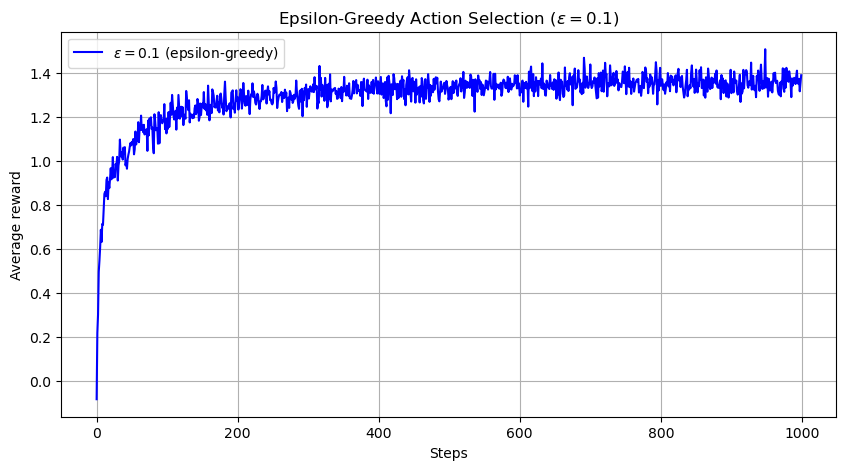

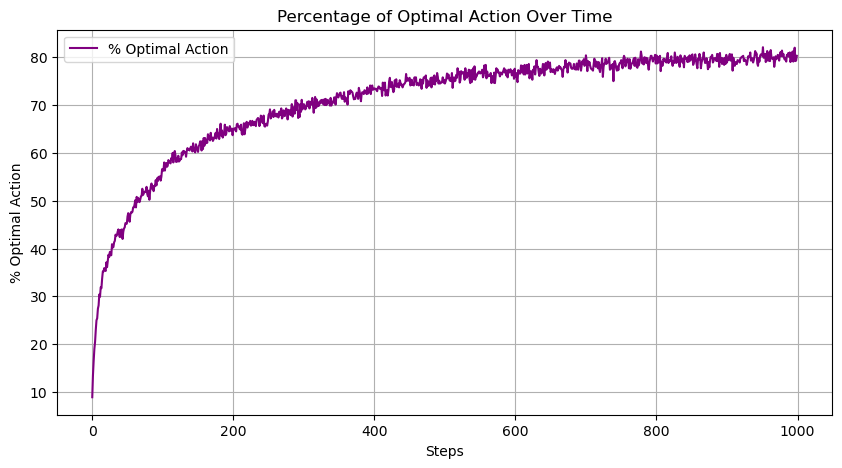

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10            # number of arms
steps = 1000      # number of steps per run
runs = 1000       # number of independent runs
epsilon = 0.1     # exploration rate for epsilon-greedy

# Store all rewards and optimal action tracking from all runs
all_rewards = np.zeros((runs, steps))
optimal_action_counts = np.zeros((runs, steps))

# Run simulation
for run in range(runs):
    # Step 1: Initialize the true action values (q*) for this run
    q_star = np.random.normal(0, 1, k)  # true values for each arm
    optimal_action = np.argmax(q_star)  # the actual best action

    # Step 2: Initialize estimated values and action counts
    Q = np.zeros(k)         # estimated value of each action
    N = np.zeros(k)         # number of times each action has been selected

    # Step 3: Loop over time steps
    for t in range(steps):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.randint(k)  # explore: random action
        else:
            action = np.argmax(Q)          # exploit: best known action

        # Check if selected action is the optimal one
        if action == optimal_action:
            optimal_action_counts[run, t] = 1

        # Get reward from environment (with noise)
        reward = np.random.normal(q_star[action], 1)

        # Update action count and estimate
        N[action] += 1
        alpha = 1 / N[action]
        Q[action] += alpha * (reward - Q[action])

        # Store reward
        all_rewards[run, t] = reward

# Compute average reward and optimal action percentage at each time step
avg_rewards = all_rewards.mean(axis=0)
optimal_action_percent = optimal_action_counts.mean(axis=0) * 100

# Print the final selected greedy action based on last Q
final_action = np.argmax(Q)
#print(f"Final selected action: {final_action}")
#print(f"q_star: {q_star}")
final_action, q_star

# Plotting average reward
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards, color='blue', label=fr'$\varepsilon = {epsilon}$ (epsilon-greedy)')
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title(fr"Epsilon-Greedy Action Selection ($\varepsilon = {epsilon}$)")
plt.legend()
plt.grid(True)
plt.show()

# Plotting optimal action percentage
plt.figure(figsize=(10, 5))
plt.plot(optimal_action_percent, color='purple', label="% Optimal Action")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Percentage of Optimal Action Over Time")
plt.legend()
plt.grid(True)
plt.show()
